# This is for CS543 MP2
Name: Luning Wang    Netid: luningw2

# Part 1: Hybrid Images

In [1]:
import os
import sys
import glob
import re
import numpy as np
import matplotlib.pyplot as plt
import cv2
import matplotlib.image as mpimg
from skimage import color, io, transform
import scipy
from scipy.ndimage import gaussian_filter
from PIL import Image

In [2]:
def read_image(IMG_NAME):
    img = cv2.imread(IMG_NAME) 
    return img

def make_hybrid(img1, img2, h, w, sig1, sig2):
    low_img = gaussian_filter(img1, sigma = sig1)
    high_img = img2 - gaussian_filter(img2, sigma = sig2)

    hybrid = (low_img + high_img) / 2
    hybrid_resized = transform.resize(hybrid, (int(h / 5), int(w / 5)), anti_aliasing=True)
    return hybrid, hybrid_resized

def make_hybrid_color(img1, img2, h, w, sig1, sig2):
    hybridr, hybrid_resizedr = make_hybrid(img1[:,:,0], img2[:,:,0], h, w, sig1, sig2)
    hybridg, hybrid_resizedg = make_hybrid(img1[:,:,1], img2[:,:,1], h, w, sig1, sig2)
    hybridb, hybrid_resizedb = make_hybrid(img1[:,:,2], img2[:,:,2], h, w, sig1, sig2)

    hybrid = np.dstack((hybridr, hybridg, hybridb))
    hybrid = np.clip(hybrid, 0, 255).astype(np.uint8)
    hybrid_resized = np.dstack((hybrid_resizedr, hybrid_resizedg, hybrid_resizedb))
    hybrid_resized = np.clip(hybrid_resized, 0, 255).astype(np.uint8)
    return hybrid, hybrid_resized

def show_pyramid(list_of_image):
    fig = plt.figure(figsize=(20,10))
    ax1 = fig.add_subplot(2,5,1)
    ax1.imshow(list_of_image[0])
    ax1 = fig.add_subplot(2,5,2)
    ax1.imshow(list_of_image[1])
    ax1 = fig.add_subplot(2,5,3)
    ax1.imshow(list_of_image[2])
    ax1 = fig.add_subplot(2,5,4)
    ax1.imshow(list_of_image[3])
    ax1 = fig.add_subplot(2,5,5)
    ax1.imshow(list_of_image[4])
    ax1 = fig.add_subplot(2,5,6)
    ax1.imshow(list_of_image[5])
    ax1 = fig.add_subplot(2,5,7)
    ax1.imshow(list_of_image[6])
    ax1 = fig.add_subplot(2,5,8)
    ax1.imshow(list_of_image[7])
    ax1 = fig.add_subplot(2,5,9)
    ax1.imshow(list_of_image[8])
    ax1 = fig.add_subplot(2,5,10)
    ax1.imshow(list_of_image[9])
    
def laplacian_pyramid(img, h, w):
    list_of_image = []
    old_img = np.zeros((h, w))
    for i in range(46, 0, -5):
        l = gaussian_filter(img, sigma = float(i / 10))
        diff_img = l - old_img
        list_of_image.append(diff_img)
    show_pyramid(list_of_image)

/Users/wangluning/miniconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


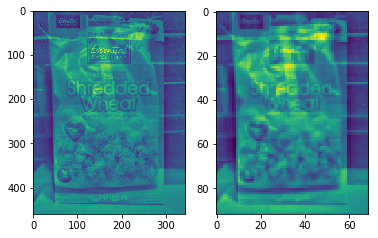

In [3]:
dirs = 'part1_img/'
# original implementation of ABCD
gray_cereal = color.rgb2gray(io.imread(dirs + 'cereal.jpg')).astype(float)
gray_box = color.rgb2gray(io.imread(dirs + 'box.jpg')).astype(float)
h, w = np.shape(gray_box)

hybrid, hybrid_resized = make_hybrid(gray_cereal, gray_box, h, w, 1, 15)

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(hybrid)
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(hybrid_resized)

# my own two pics

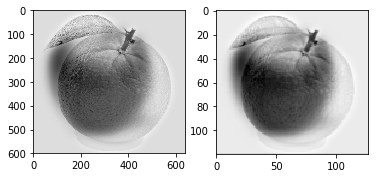

In [4]:
gray_apple = color.rgb2gray(io.imread(dirs + 'apple.jpg')).astype(float)
gray_orange = color.rgb2gray(io.imread(dirs + 'orange.jpg')).astype(float)
h, w = np.shape(gray_orange)

hybrid, hybrid_resized = make_hybrid(gray_apple, gray_orange, h, w, 20, 15)

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(hybrid, cmap='Greys_r')
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(hybrid_resized, cmap='Greys_r')

# EC1: with color images cereal and box

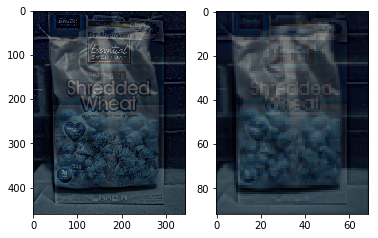

In [5]:
color_cereal = read_image(dirs + 'cereal.jpg').astype(float)
color_box = read_image(dirs + 'box.jpg').astype(float)
h, w, s = np.shape(color_box)

hybrid, hybrid_resized = make_hybrid_color(color_cereal, color_box, h, w, 1, 5)

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(hybrid)
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(hybrid_resized)

# EC2: failure cases, pic with HPF do not have clear texture, but with smooth surface

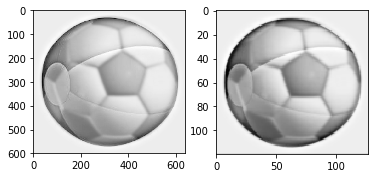

In [6]:
gray_ball = color.rgb2gray(io.imread(dirs + 'ball.jpg')).astype(float)
gray_ball2 = color.rgb2gray(io.imread(dirs + 'ball2.jpg')).astype(float)
h, w = np.shape(gray_ball)

hybrid, hybrid_resized = make_hybrid(gray_ball, gray_ball2, h, w, 5, 15)

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(hybrid, cmap='Greys_r')
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(hybrid_resized, cmap='Greys_r')

# EC3: Laplacian pyramids as BPF

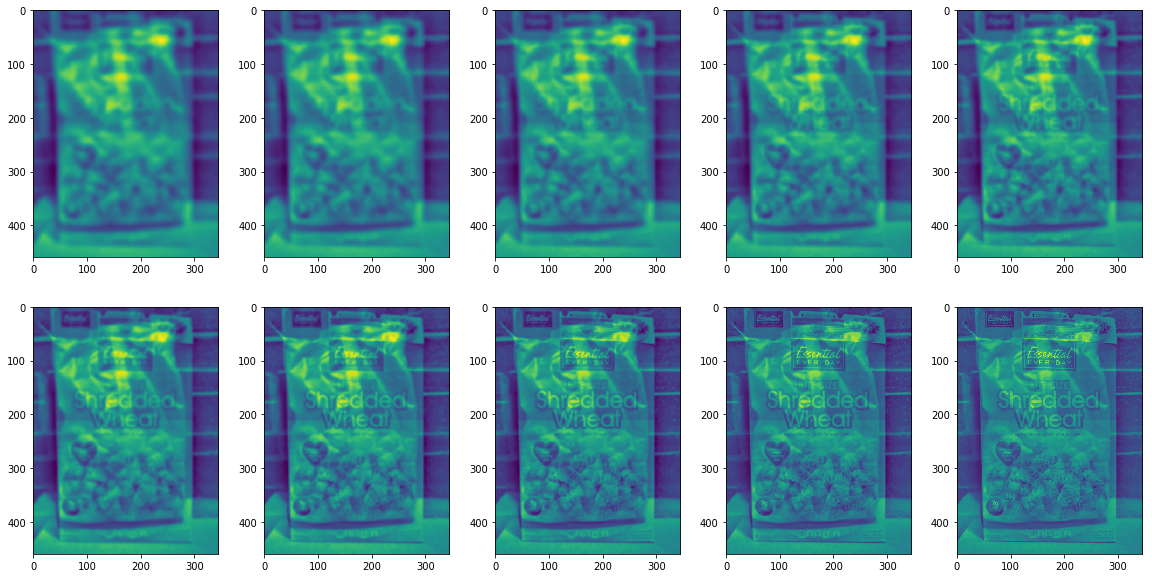

In [7]:
h, w = np.shape(gray_box)
hybrid, hybrid_resized = make_hybrid(gray_cereal, gray_box, h, w, 1, 15)
laplacian_pyramid(hybrid, h, w)